In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data/USArrests.csv", index_col = 0)

In [3]:
data.head(3)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0


In [4]:
data.tail(3)

,Murder,Assault,UrbanPop,Rape
West Virginia,5.7,81,39,9.3
Wisconsin,2.6,53,66,10.8
Wyoming,6.8,161,60,15.6


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [6]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


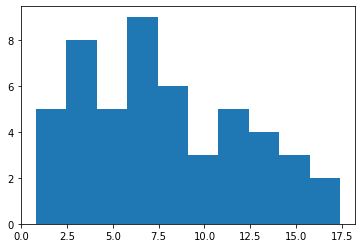

In [7]:
plt.hist(data['Murder'])
plt.show()

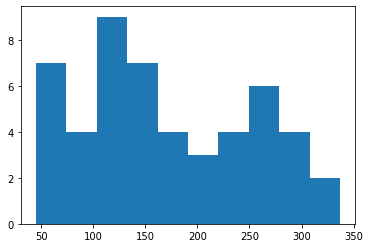

In [8]:
plt.hist(data['Assault'])
plt.show()

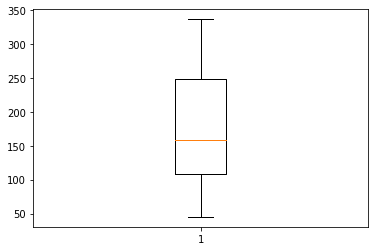

In [9]:
plt.boxplot(data['Assault'])
plt.show()

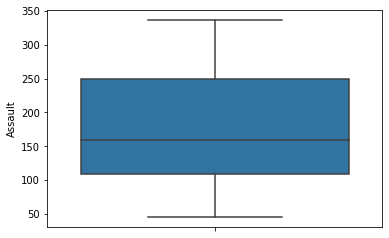

In [10]:
sns.boxplot(y = data['Assault'])
plt.show()

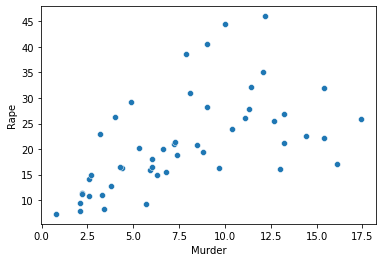

In [11]:
sns.scatterplot(x = "Murder", y = "Rape", data = data)
plt.show()

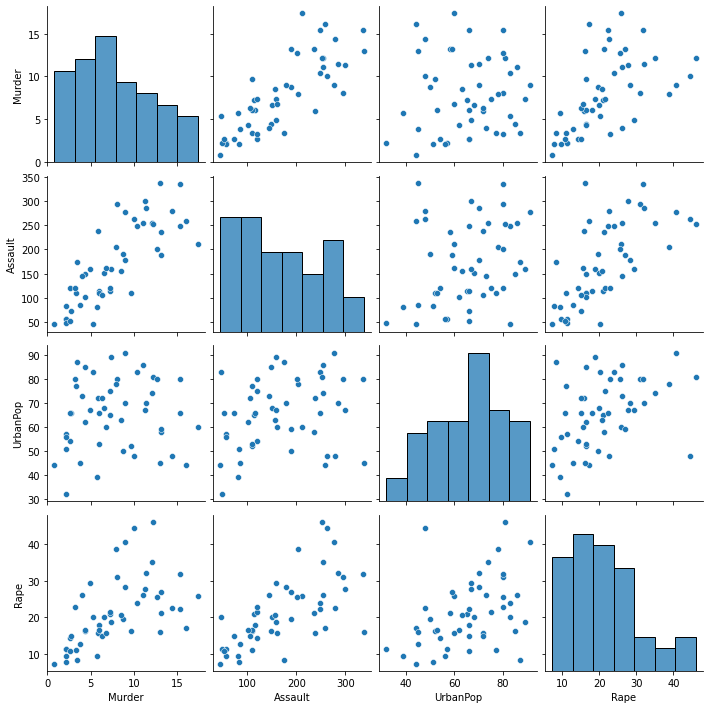

In [12]:
sns.pairplot(data)
plt.show()

In [13]:
data.isna().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [14]:
x = data

In [15]:
from sklearn.cluster import KMeans

In [16]:
kmean_inst = KMeans(n_clusters=6)

In [17]:
kmean_inst.fit(x)

KMeans(n_clusters=6)

In [18]:
kmean_inst.inertia_

18768.000666666667

In [19]:
kmean_inst.cluster_centers_

array([[  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [ 11.76666667, 257.91666667,  68.41666667,  28.93333333],
       [  5.75      , 156.75      ,  74.        ,  19.4       ],
       [ 11.95      , 316.5       ,  68.        ,  26.7       ],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [ 11.5       , 195.33333333,  66.16666667,  27.43333333]])

In [20]:
kmean_inst.labels_

array([1, 1, 3, 5, 1, 5, 4, 1, 3, 5, 0, 4, 1, 4, 0, 4, 4, 1, 0, 3, 2, 1,
       0, 1, 5, 4, 4, 1, 0, 2, 1, 1, 3, 0, 4, 2, 2, 4, 2, 1, 0, 5, 5, 4,
       0, 2, 2, 0, 0, 2], dtype=int32)

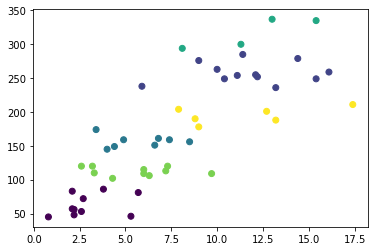

In [21]:
plt.scatter(data['Murder'], data['Assault'], c = kmean_inst.labels_)
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
km_labels = kmean_inst.labels_

In [24]:
data['km_clus_label'] = km_labels

In [25]:
# data

In [26]:
sc = StandardScaler()
x = sc.fit_transform(data)

In [27]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

In [28]:
mergings = linkage(x , method = "average")

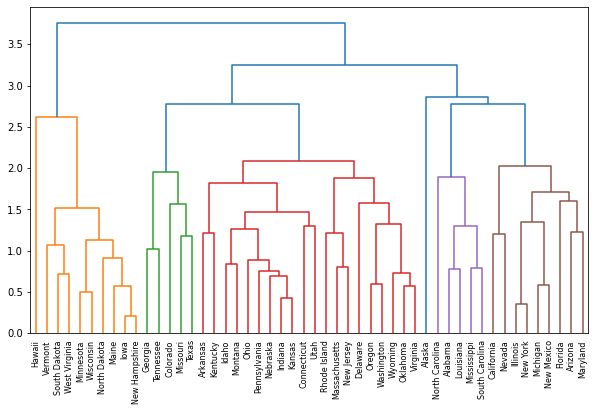

In [29]:
plt.figure(figsize=(10,6))
dendrogram(mergings, labels = data.index)
plt.show()